# Langevin Dynamics

## Goals 

* Consider a mix of directed and undirected motion
* Study the interplay between mass, friction and random force


*To start learning about modeling collective phenomena, e.g. how atoms and molecules move around, we'll need to put these two concepts together!*

[Langevin dynamics](https://en.wikipedia.org/wiki/Langevin_dynamics) describes motion that is both directed and diffusive:

\begin{equation}
m\overrightarrow{a} = - \nabla U(\overrightarrow{x}) - \gamma m \overrightarrow{v} + \sqrt{2 \gamma k_B T m} \overrightarrow{R}(t),
\end{equation}

where $m$ is the mass, $\overrightarrow{a}$ is the acceleration, $\overrightarrow{v}$ is the velocity, $\overrightarrow{x}$ is the position, $\nabla U(\overrightarrow{x})$ is the gradient of the potential energy (let's not worry about that for now), $\gamma$ is the friction coefficient, $k_BT$ is the thermal energy, and $\overrightarrow{R}(t)$ is a random force that kicks the particles around. 

So how do we use this to run trajectories?  First, let's remember our equations from kinematics (take a look back if this is all a bit hazy...):

\begin{equation} \overrightarrow{x}(t+\Delta t) \approx \overrightarrow{x}(t) + \overrightarrow{v}(t) \Delta t, \end{equation}

\begin{equation} \overrightarrow{v}(t+\Delta t) \approx \overrightarrow{v}(t) + \overrightarrow{a}(t) \Delta t. \end{equation}

Then we'll plug in the Langevin equation to the velocity update equation:

\begin{equation} \overrightarrow{v}(t+\Delta t) \approx \overrightarrow{v}(t) + \Delta t \left(- \frac{1}{m}\nabla U(\overrightarrow{x}) - \gamma \overrightarrow{v} + \sqrt{\frac{2 \gamma k_B T}{m} } \overrightarrow{R}(t) \right). \end{equation}

OK, let's jump right in here!

In [14]:
import numpy as np
np.random.seed(3)

# define our constants
m = 1      # the mass of our particle 
kT = 1     # thermal energy
gamma = 1  # friction coefficient
dt = 0.01  # time step
N = 10000  # number of time steps
save_int = 10  # how often to save the position
pref = (2*gamma*kT/m)**(0.5)   # prefactor for random force
                               # (only compute once and store)

x0 = np.array([0,0])  # initial position
v0 = np.array([1,1])  # initial velocity

# functions for updating system coordinates
def updatepos(xold,vold):
    # returns the new positions, using the old positions and the old velocities
    xnew = xold + vold*dt
    return xnew

def updatevel(xold,vold):
    # returns the new velocities, given the old acceleration
    # which is the sum of the external forces, a drag term, and a random force
    vnew = vold + dt*(-force(xold)/m - gamma*vold + pref*rfunc())
    return vnew
    
def force(xold):
    # let's forget about this for now and return an array of zeros
    f0 = np.array([0,0])
    return f0

def rfunc():
    # return a vector with components chosen from a Gaussian distribution
    r = np.random.normal(size=2)
    return r

# ----------------------------------
#    simulation starts here
# ----------------------------------

x = x0
v = v0
traj = x

for step in range(N):
    # update position and velocities
    xn = updatepos(x,v)
    vn = updatevel(x,v)

    # shift new values into main arrays
    x,v = xn,vn

    # save the position every save_int steps
    if step % save_int == 0:
        traj = np.row_stack((traj,x))

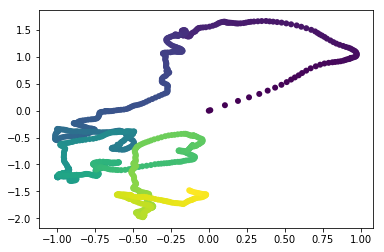

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

# make gradient color array
color=np.array(range(0,int(N/save_int)+1),dtype='float')
# scatter plot with gradient color
plt.scatter(traj.T[0],traj.T[1],c=color,edgecolors='none')
# render
plt.show()

Very cool!  We used color to plot out the time of the trajectory (blue = starting position, red = final position).

***
### Now let's play around with this a bit and see what these parameters do!
**Question 1a):** What would happen if you increased the mass?  Before you run a simulation, look at the equation and estimate.

The particle moves slower. In the same time period, the range it can reach is smaller.

**Question 1b):** To test this hypothesis, plot a trajectory with the mass increased by a factor of 10, and another with the mass decreased by a factor of 10. (Here we simply copy the two code blocks above and change the relevant parameter, such as mass. You can do the same in the questions that follow.)

In [16]:
import numpy as np

# define our constants
m = 10     # the mass of our particle 
kT = 1     # thermal energy
gamma = 1  # friction coefficient
dt = 0.01  # time step
N = 10000  # number of time steps
save_int = 10  # how often to save the position
pref = (2*gamma*kT/m)**(0.5)   # prefactor for random force
                               # (only compute once and store)

x0 = np.array([0,0])  # initial position
v0 = np.array([1,1])  # initial velocity

# functions for updating system coordinates
def updatepos(xold,vold):
    # returns the new positions, using the old positions and the old velocities
    xnew = xold + vold*dt
    return xnew

def updatevel(xold,vold):
    # returns the new velocities, given the old acceleration
    # which is the sum of the external forces, a drag term, and a random force
    vnew = vold + dt*(-force(xold)/m - gamma*vold + pref*rfunc())
    return vnew
    
def force(xold):
    # let's forget about this for now and return an array of zeros
    f0 = np.array([0,0])
    return f0

def rfunc():
    # return a vector with components chosen from a Gaussian distribution
    r = np.random.normal(size=2)
    return r

# ----------------------------------
#    simulation starts here
# ----------------------------------

x = x0
v = v0
traj = x

for step in range(N):
    # update position and velocities
    xn = updatepos(x,v)
    vn = updatevel(x,v)

    # shift new values into main arrays
    x,v = xn,vn

    # save the position every save_int steps
    if step % save_int == 0:
        traj = np.row_stack((traj,x))

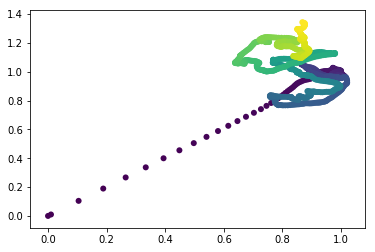

In [17]:
import matplotlib.pyplot as plt
% matplotlib inline

# make gradient color array
color=np.array(range(0,int(N/save_int)+1),dtype='float')
# scatter plot with gradient color
plt.scatter(traj.T[0],traj.T[1],c=color,edgecolors='none')
# render
plt.show()

**Question 2a):**  What parameter would we have to change to make the motion purely inertial (i.e. like there are no forces at all), like in our kinematics example?

Change prefactor for random force to 0.

**Question 2b):** Try it out, see if it works!

In [18]:
import numpy as np

# define our constants
m = 10     # the mass of our particle 
kT = 1     # thermal energy
gamma = 1  # friction coefficient
dt = 0.01  # time step
N = 10000  # number of time steps
save_int = 10  # how often to save the position
pref = 0   # prefactor for random force
                               # (only compute once and store)

x0 = np.array([0,0])  # initial position
v0 = np.array([1,1])  # initial velocity

# functions for updating system coordinates
def updatepos(xold,vold):
    # returns the new positions, using the old positions and the old velocities
    xnew = xold + vold*dt
    return xnew

def updatevel(xold,vold):
    # returns the new velocities, given the old acceleration
    # which is the sum of the external forces, a drag term, and a random force
    vnew = vold + dt*(-force(xold)/m - gamma*vold + pref*rfunc())
    return vnew
    
def force(xold):
    # let's forget about this for now and return an array of zeros
    f0 = np.array([0,0])
    return f0

def rfunc():
    # return a vector with components chosen from a Gaussian distribution
    r = np.random.normal(size=2)
    return r

# ----------------------------------
#    simulation starts here
# ----------------------------------

x = x0
v = v0
traj = x

for step in range(N):
    # update position and velocities
    xn = updatepos(x,v)
    vn = updatevel(x,v)

    # shift new values into main arrays
    x,v = xn,vn

    # save the position every save_int steps
    if step % save_int == 0:
        traj = np.row_stack((traj,x))

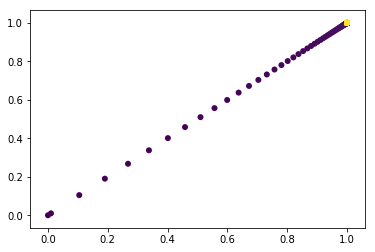

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

# make gradient color array
color=np.array(range(0,int(N/save_int)+1),dtype='float')
# scatter plot with gradient color
plt.scatter(traj.T[0],traj.T[1],c=color,edgecolors='none')
# render
plt.show()

**Question 3a):** How could you change the parameters to make this particle look more like a random walk? (I.e. to make sure it very quickly "forgets" its velocity?)

change the vold to zero in updatevel function

**Question 3b):** Try it out with an initial velocity of (10,10), see what it looks like!

In [31]:
# code here
import numpy as np

# define our constants
m = 10     # the mass of our particle 
kT = 1     # thermal energy
gamma = 1  # friction coefficient
dt = 0.01  # time step
N = 10000  # number of time steps
save_int = 10  # how often to save the position
pref = (2*gamma*kT/m)**(0.5)   # prefactor for random force
                               # (only compute once and store)

x0 = np.array([0,0])  # initial position
v0 = np.array([1,1])  # initial velocity

# functions for updating system coordinates
def updatepos(xold,vold):
    # returns the new positions, using the old positions and the old velocities
    xnew = xold + vold*dt
    return xnew

def updatevel(xold,vold=0):
    # returns the new velocities, given the old acceleration
    # which is the sum of the external forces, a drag term, and a random force
    vnew = vold + dt*(-force(xold)/m - gamma*vold + pref*rfunc())
    return vnew
    
def force(xold):
    # let's forget about this for now and return an array of zeros
    f0 = np.array([0,0])
    return f0

def rfunc():
    # return a vector with components chosen from a Gaussian distribution
    r = np.random.normal(size=2)
    return r

# ----------------------------------
#    simulation starts here
# ----------------------------------

x = x0
v = v0
traj = x

for step in range(N):
    # update position and velocities
    xn = updatepos(x,v)
    vn = updatevel(x,v)

    # shift new values into main arrays
    x,v = xn,vn

    # save the position every save_int steps
    if step % save_int == 0:
        traj = np.row_stack((traj,x))

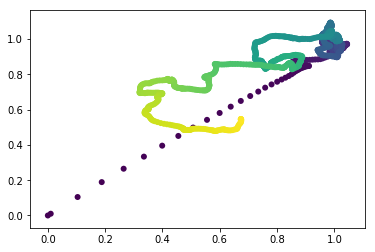

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

# make gradient color array
color=np.array(range(0,int(N/save_int)+1),dtype='float')
# scatter plot with gradient color
plt.scatter(traj.T[0],traj.T[1],c=color,edgecolors='none')
# render
plt.show()

**Question 4a):** Write a function called `pbc_check` that implements periodic boundary conditions (i.e. if you go out the right side, you'll come back in on the left, and if you go out the top side you'll come in on the bottom, etc.).  Restrict the particle to a box of side-length 1.

In [11]:
# code here
def pbc_check(x):
    if x[0]>1:
        x[0] -= 1
    elif x[0] < 0:
        x[0] += 1
    if x[1]>1:
        x[1] -= 1
    elif x[1] < 0:
        x[1] += 1

**Question 4b):** Run another trajectory, this time calling `pbc_check` after every update.

In [12]:
# code here
import numpy as np

# define our constants
m = 10     # the mass of our particle 
kT = 1     # thermal energy
gamma = 1  # friction coefficient
dt = 0.01  # time step
N = 10000  # number of time steps
save_int = 10  # how often to save the position
pref = (2*gamma*kT/m)**(0.5)   # prefactor for random force
                               # (only compute once and store)

x0 = np.array([0,0])  # initial position
v0 = np.array([1,1])  # initial velocity

# functions for updating system coordinates
def updatepos(xold,vold):
    # returns the new positions, using the old positions and the old velocities
    xnew = xold + vold*dt
    return xnew

def updatevel(xold,vold):
    # returns the new velocities, given the old acceleration
    # which is the sum of the external forces, a drag term, and a random force
    vnew = vold + dt*(-force(xold)/m - gamma*vold + pref*rfunc())
    return vnew
    
def force(xold):
    # let's forget about this for now and return an array of zeros
    f0 = np.array([0,0])
    return f0

def rfunc():
    # return a vector with components chosen from a Gaussian distribution
    r = np.random.normal(size=2)
    return r

# ----------------------------------
#    simulation starts here
# ----------------------------------

x = x0
v = v0
traj = x

for step in range(N):
    # update position and velocities
    xn = updatepos(x,v)
    vn = updatevel(x,v)
    
    pbc_check(xn)

    # shift new values into main arrays
    x,v = xn,vn

    # save the position every save_int steps
    if step % save_int == 0:
        traj = np.row_stack((traj,x))

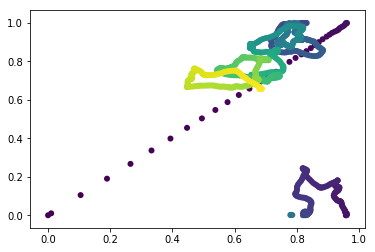

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline

# make gradient color array
color=np.array(range(0,int(N/save_int)+1),dtype='float')
# scatter plot with gradient color
plt.scatter(traj.T[0],traj.T[1],c=color,edgecolors='none')
# render
plt.show()

---
## Congratulations, you are done!
---